In [1]:
from pylab import *

In [2]:
def malla_cuad_circ(x,y,r=0.5,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) < r:
                malla[i,j] = 1
            else:
                malla[i,j] = V0*rand()
    return malla

def Relajar(V,V0=1):
    Nx , Ny = V.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if V[i,j] != 1:
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V

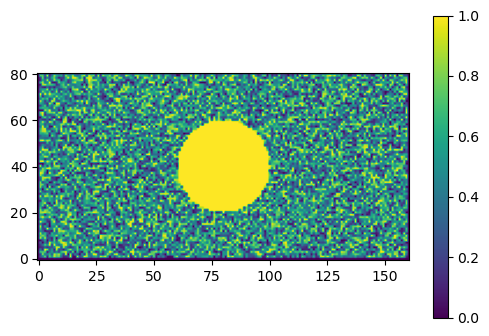

In [3]:
delta = 0.025
x = arange(-2,2+delta,delta)
y = arange(-1,1+delta,delta)
XX , YY = meshgrid(x,y)
V = malla_cuad_circ(x,y)
figure(dpi=100)
imshow(V.transpose(),origin='lower')
gca().set_aspect('equal')
colorbar()
show()

In [4]:
for i in range(1500):
    V = Relajar(V)

In [5]:
Ex,Ey = gradient(-V)

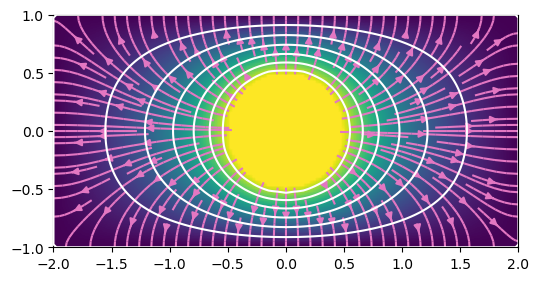

In [6]:
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower',zorder=0)
contour(XX , YY ,V.transpose(),colors='white',zorder=10)
streamplot(XX,YY,Ex.transpose(),Ey.transpose(),color='tab:pink',density=1.3,
          maxlength=10)
gca().set_aspect('equal')
show()

In [32]:
def malla_cuad_2circ(x,y,r=0.5,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( (x[i]-0.35)**2 + y[j]**2) < r or sqrt( (x[i]+0.35)**2 + y[j]**2) <r:
                malla[i,j] = 1
            else:
                malla[i,j] = V0*rand()
    return malla

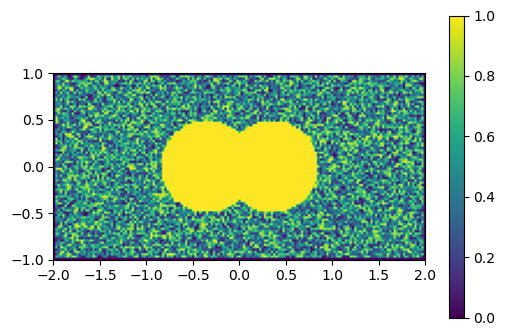

In [33]:
delta = 0.025
x = arange(-2,2+delta,delta)
y = arange(-1,1+delta,delta)
XX , YY = meshgrid(x,y)
V = malla_cuad_2circ(x,y)
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
gca().set_aspect('equal')
colorbar()
show()

In [34]:
for i in range(1500):
    V = Relajar(V)

In [35]:
Ex,Ey = gradient(-V)

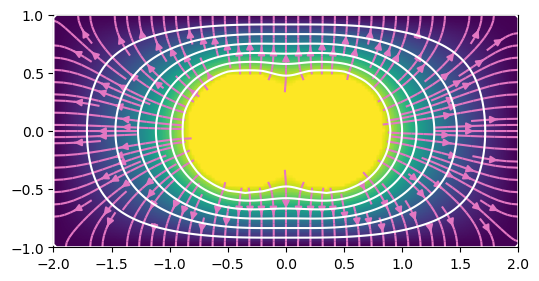

In [36]:
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower',zorder=0)
contour(XX , YY ,V.transpose(),colors='white',zorder=10)
streamplot(XX,YY,Ex.transpose(),Ey.transpose(),color='tab:pink',density=1.3,
          maxlength=10)
gca().set_aspect('equal')
show()

In [82]:
def malla_cuad_circ_th(x,y,r=0.5,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) < r:
                th = arctan2(y[j],x[i])
                malla[i,j] = V0*(sin(th)**2)
            else:
                malla[i,j] = V0*rand()
    return malla

def Relajar_circ_th(V,x,y,r=0.5):
    Nx , Ny = V.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) > r:
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V    

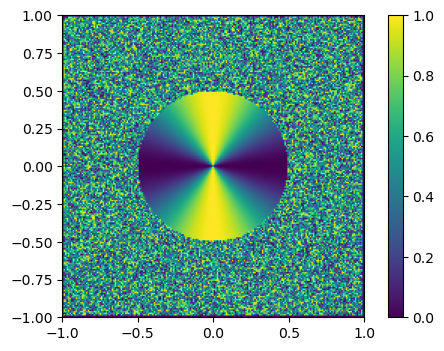

In [85]:
delta = 0.01
x = arange(-1,1+delta,delta)
y = arange(-1,1+delta,delta)
XX , YY = meshgrid(x,y)
V = malla_cuad_circ_th(x,y)
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
gca().set_aspect('equal')
colorbar()
show()

In [96]:
for i in range(1500):
    V = Relajar_circ_th(V,x,y)

In [97]:
Ex,Ey = gradient(-V)

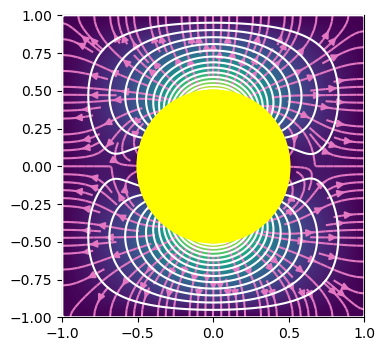

In [98]:
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower',zorder=0)
niveles = linspace(0,0.99,15)
contour(XX , YY ,V.transpose(),colors='white',levels=niveles,zorder=10)
streamplot(XX,YY,Ex.transpose(),Ey.transpose(),color='tab:pink',density=1.3,
          maxlength=10)
plot([0],[0],'o',color='yellow',markersize=110,zorder=20)
th = linspace(0,2*pi)
plot(0.5*cos(th),0.5*sin(th),color='yellow')
gca().set_aspect('equal')
show()